# Introduction to Artificial Intelligence

First, let's import the required libraries

In [ ]:
import pandas as pd #TODO: add balanced classes reporting (multi vs binary) multi remaining binary plotted

Let's read the data from the CSV file

In [2]:
df = pd.read_csv('full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


Plotting the Binary-class classification distribution in the dataset

target
0    3519
1    2873
Name: count, dtype: int64


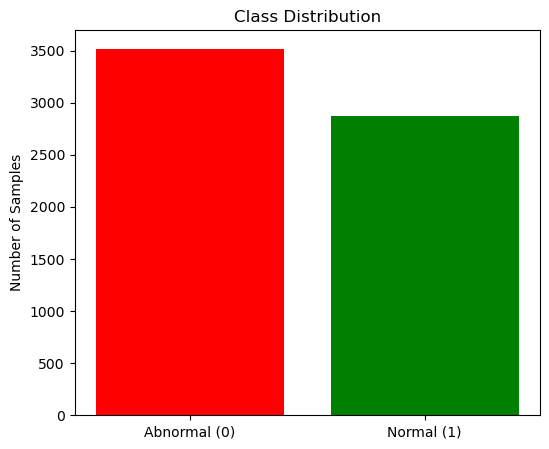

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df['target'] has 1 for normal and 0 for abnormal
# Count the number of samples in each class
class_counts = df['target'].value_counts().sort_index()  # 0 -> abnormal, 1 -> normal
print(df['target'].value_counts())
# Plot using matplotlib
plt.figure(figsize=(6,5))
plt.bar(['Abnormal (0)', 'Normal (1)'], class_counts, color=['red', 'green'])
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.show()




Converting each image into its vector and flattening it . (2D -> 1D)

In [3]:
from PIL import Image
import numpy as np
import os

image_folder = 'preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Looping the files inside the preprocessed_images folder
for idx, file in enumerate(image_files):
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')  
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten() 


We want to convert each image to a vector so that we are able to process the numerical data for classification. To do so, we will create a new column in the dataframe and store the feature vector of each data point(image) into the corrosponding row.

In [4]:
from PIL import Image
import numpy as np
import os

image_folder = 'preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_data'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')  
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten() 
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_data'] = flat_vector
df


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


This dataset has originally 8 classes. Due to the complexity of the classes and their imbalance, we decided to work with binary classification; class = 1 for all normal labels, and class=0 for all others. To do so, we will check the target column of the dataset. If the first value is 1 it means the value is normal, otherwise it is abnormal (class=0).

In [5]:
import ast

clean_targets = []    # initializing the empty list
for value in df['target']:
    if isinstance(value, str):
        value = ast.literal_eval(value)    # converting str to real numbers indicating "[1,0,0]" -> [1,0,0]
    clean_targets.append(value)
df['target'] = clean_targets       # every row in the column target in the dataframe has value for eg. [0,0,1]

# Convert list to single value 1 or 0
new_targets = []  
for value in df['target']:   # each value is a list now
    first_element = value[0]   # extracting the first element of every list

    if first_element == 1:
        new_targets.append('1')   
    else:
        new_targets.append('0')

df['target'] = new_targets


After the necessarry transformations, we are going to print the finalized dataframe with the binary classes and the new column ("input_data") for the vectors of our images.

In [6]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now we want to print the shape of the vectors to check how many features each image has

In [7]:
print(flat_vector.shape)

(786432,)


After realizing that each image has approximately 780.000 features we need to reduce the number of features to be able to run the analyses. One solution to that problem is downsizing the dimensions of the images to 100X100.

In [9]:
import os
from PIL import Image

input_folder = "preprocessed_images"
output_folder = "resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))  
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)
        print(f"Resized and saved: {filename}")

print("All images resized to 100×100 successfully!")

Resized and saved: 0_left.jpg
Resized and saved: 0_right.jpg
Resized and saved: 1005_right.jpg
Resized and saved: 1006_left.jpg
Resized and saved: 1006_right.jpg
Resized and saved: 1008_left.jpg
Resized and saved: 1008_right.jpg
Resized and saved: 100_left.jpg
Resized and saved: 100_right.jpg
Resized and saved: 1010_left.jpg
Resized and saved: 1010_right.jpg
Resized and saved: 1011_left.jpg
Resized and saved: 1011_right.jpg
Resized and saved: 1012_left.jpg
Resized and saved: 1012_right.jpg
Resized and saved: 1013_left.jpg
Resized and saved: 1013_right.jpg
Resized and saved: 1014_right.jpg
Resized and saved: 1015_left.jpg
Resized and saved: 1015_right.jpg
Resized and saved: 1016_left.jpg
Resized and saved: 1016_right.jpg
Resized and saved: 1018_right.jpg
Resized and saved: 1019_left.jpg
Resized and saved: 1019_right.jpg
Resized and saved: 101_left.jpg
Resized and saved: 101_right.jpg
Resized and saved: 1020_left.jpg
Resized and saved: 1021_left.jpg
Resized and saved: 1021_right.jpg
Resi

Now we need to see how much our features have been reduced by downsizing the images to 100X100. To do so, we will just check the first image of the resized_images folder, create its vector, flatten it and check its shape.

In [10]:
from PIL import Image
import numpy as np
import os
path="resized_images/0_left.jpg"
img = Image.open(path).convert('RGB')  
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector1 = img_array.flatten()
flat_vector1.shape

(30000,)

After downsizing the images, we managed to reduce the no. of features from 780.000 to 30.000 which is more easy to handle. Now we need to create the dataset with the vectors of all resized images. We will save the vectors of resized images to the same df, in a new column called input_data_resized

In [11]:
from PIL import Image
import numpy as np
import os

image_folder = 'resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_data_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')  
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten() 
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_data_resized'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,input_data,input_data_resized
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 4, 0, 0, 4, 0, 0, 2, 0, 0, 2, 0, 1, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 4, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 3, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, ..."


## Working with Grayscale Images

Apart from our colored data, we also want to run the same analyses for grayscale images in order to be able to compare the results of coloured and grayscale pictures. To do so, we will convert all coloured preprocessed (original size) images to grayscale format. We need to create a folder called "gray_images" that will store all grayscale images.

In [12]:
import os
import cv2

input_folder = 'preprocessed_images'
output_folder = 'gray_images'
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, gray_img)

print(f"All images have been converted to grayscale and saved to '{output_folder}'")

All images have been converted to grayscale and saved to 'gray_images'


After creating the grayscale images, we want to check the no. of features. We will just check the shape of the first image of grayscale images folder.

In [13]:
from PIL import Image
import numpy as np
import os
path="gray_images/0_left.jpg"
img = Image.open(path).convert('L')  
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector2 = img_array.flatten()
flat_vector2.shape

(262144,)

After converting to grayscale with their original dimensions, the images have 260.000 features. We will also downsize the grayscale images to further reduce the no. of features. We will create a new folder called gray_resized_images and follow the same logic as in the coloured images.

In [14]:
import os
from PIL import Image

input_folder = "gray_images"
output_folder = "gray_resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))  
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)
        print(f"Resized and saved: {filename}")

print("All grayscale images resized to 100×100 successfully!")

Resized and saved: 0_left.jpg
Resized and saved: 0_right.jpg
Resized and saved: 1005_right.jpg
Resized and saved: 1006_left.jpg
Resized and saved: 1006_right.jpg
Resized and saved: 1008_left.jpg
Resized and saved: 1008_right.jpg
Resized and saved: 100_left.jpg
Resized and saved: 100_right.jpg
Resized and saved: 1010_left.jpg
Resized and saved: 1010_right.jpg
Resized and saved: 1011_left.jpg
Resized and saved: 1011_right.jpg
Resized and saved: 1012_left.jpg
Resized and saved: 1012_right.jpg
Resized and saved: 1013_left.jpg
Resized and saved: 1013_right.jpg
Resized and saved: 1014_right.jpg
Resized and saved: 1015_left.jpg
Resized and saved: 1015_right.jpg
Resized and saved: 1016_left.jpg
Resized and saved: 1016_right.jpg
Resized and saved: 1018_right.jpg
Resized and saved: 1019_left.jpg
Resized and saved: 1019_right.jpg
Resized and saved: 101_left.jpg
Resized and saved: 101_right.jpg
Resized and saved: 1020_left.jpg
Resized and saved: 1021_left.jpg
Resized and saved: 1021_right.jpg
Resi

Now, we need to check how much the features were reduced by downsizing the grayscale images

In [15]:
from PIL import Image
import numpy as np
import os
path="gray_resized_images/0_left.jpg"
img = Image.open(path).convert('L')  
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector3 = img_array.flatten()
flat_vector3.shape

(10000,)

We managed to reduce the number of grayscale images from 260.000 to just 10.000 features.

Now we want to add to our dataframe the vectors for both original and resized grayscale images. We will use the same logic as in coloured images.

In [16]:
image_folder = 'gray_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_gray'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')  
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten() 
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_gray'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,H,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 4, 0, 0, 4, 0, 0, 2, 0, 0, 2, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 4, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 3, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [17]:
image_folder = 'gray_resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_gray_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')  
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten() 
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_gray_resized'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray,input_gray_resized
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 4, 0, 0, 4, 0, 0, 2, 0, 0, 2, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 4, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 3, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## PCA

We have managed to reduce the no. of features by downsizing the images (30.000 for coloured and 10.000 for grayscale). We will also apply PCA on both grayscale and coloured to further reduce their features.

In [18]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Applying PCA on coloured resized images 100x100

In [19]:
b = df["input_data_resized"].values
X1 = np.stack(b)
Y1 = df["target"].values
X1.shape, Y1.shape


((6392, 30000), (6392,))

In [20]:
print(f'Total samples: {X1.shape[0]}, Features per sample: {X1.shape[1]}')

Total samples: 6392, Features per sample: 30000


After having created our X1 and Y1 values, we also need to apply standardization (mean=0, std=1) to our X1 data.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [22]:
pca = PCA(n_components=600) #TODO: variance or no. of components
X_pca = pca.fit_transform(X_scaled)

print(f'Reduced features shape: {X_pca.shape}')

Reduced features shape: (6392, 600)


In [23]:
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

Cumulative: [0.41697603 0.55083107 0.63607087 0.709346   0.76524376 0.80886627
 0.84073224 0.85412151 0.86673132 0.87818128 0.88705334 0.89307134
 0.89825965 0.90310059 0.90749497 0.9118007  0.91566497 0.91900985
 0.92205843 0.92493575 0.92744532 0.92975608 0.93184884 0.93368872
 0.93545494 0.93702224 0.93851797 0.93989773 0.94122903 0.94252044
 0.94363524 0.9447164  0.94576201 0.9467703  0.94774767 0.9486474
 0.94951365 0.95035537 0.95116474 0.951945   0.95268568 0.95340237
 0.95410587 0.95476852 0.9554186  0.95602578 0.95662533 0.95720735
 0.95778523 0.95834182 0.95887029 0.9593912  0.95990589 0.96038765
 0.96085908 0.96131709 0.96175528 0.96217984 0.96257186 0.96295719
 0.96332868 0.96369122 0.96404425 0.96438291 0.96471833 0.96504159
 0.96536104 0.96567768 0.9659804  0.96628057 0.96657977 0.96687047
 0.96715063 0.96742168 0.96768797 0.96795121 0.96820705 0.96845626
 0.96869909 0.96894114 0.96917431 0.96940277 0.96962663 0.96984529
 0.97005932 0.97027087 0.97047745 0.97067908 0.9708

In [24]:
X_pca.shape, Y1.shape

((6392, 600), (6392,))

We have reduced the no. of components to just 600 features by keeping 99.1% of variance.

Applying PCA on grayscale images 100x100

In [25]:
b = df["input_gray_resized"].values
X2 = np.stack(b)
Y2 = df["target"].values
X2.shape, Y2.shape

((6392, 10000), (6392,))

Applying standardization for grayscale images too

In [26]:
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X2)

In [27]:
pca2 = PCA(n_components=600) #TODO: variance or no. of components
X_pca2 = pca2.fit_transform(X_scaled_2)

print(f'Reduced features shape: {X_pca2.shape}')

Reduced features shape: (6392, 600)


In [28]:
print("Cumulative for grayscale:", np.cumsum(pca2.explained_variance_ratio_))

Cumulative for grayscale: [0.48995361 0.62379624 0.71616807 0.78040508 0.83228584 0.86715086
 0.88210379 0.89506089 0.90608663 0.91374089 0.91912534 0.92445321
 0.92932418 0.93276929 0.93596766 0.93909015 0.94167248 0.94404899
 0.94622845 0.94816958 0.94990197 0.95158756 0.95303055 0.95444208
 0.95574372 0.95693639 0.95809039 0.95913639 0.96015693 0.96112495
 0.96203601 0.96291891 0.96374813 0.96454854 0.96529237 0.96596677
 0.96662224 0.96725269 0.96786912 0.96846642 0.96901128 0.96954896
 0.97007819 0.97055729 0.97102016 0.97145745 0.97187504 0.97228315
 0.97266888 0.97304916 0.97342118 0.97378041 0.97413123 0.97446348
 0.97479238 0.97510528 0.97539554 0.97568334 0.97596457 0.97623427
 0.9764949  0.97674911 0.97699677 0.97724109 0.97747691 0.97770605
 0.97793182 0.97815539 0.97837143 0.97857968 0.97878713 0.97898725
 0.97917825 0.97936548 0.97955163 0.97973126 0.97990384 0.98006967
 0.98023152 0.98039109 0.98054882 0.98070461 0.98085852 0.98100333
 0.9811452  0.98128099 0.98141501 0.

In [29]:
X_pca2.shape, Y2.shape

((6392, 600), (6392,))

We have reduced the no. of features for grayscale images to just 600 while keeping 99.4% of the variance.

## Train_Test Splitting

Let's split our dataset into training and testing for coloured images

In [30]:
#splitting the dataset into train and testing which is 80% trainign and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, Y1, test_size=0.20, random_state=42, shuffle=True, stratify=Y1
)

# Now splitting the dataset into test and valdiation where 20% breaks down to 10% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp
)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")

Training data: (5113, 600), Validation data: (639, 600), Test data: (640, 600)


Applying PCA:
for each sample in the dataset we have 100,000 features using PCA we are reducing the number of features from 100,000 t0 600 features per sample.
As per the research the thumb rule is :
number of samples >= 10 times the number of features to have after PCA 
so earlier there were 6,000+ samples
so :
6000 >= 10 x k(number of features to be there for each sample)
6000/10 >= k
600>=k
so k<=600 (means as long as number of features for each sample are 600, it would be ideal for the data to be trained on SVM)
We now have our input data into the variable called as "X_pca" and we have our labels into "labels" folder 

Flow of number of features duirng pre-processing
1. coloured images non-resized : 700,000
2. coloured images re-sized : 30,000
3. greyscaled images non re-sized : 261,000
4. grayscaled imaged re-sizedL 10,000
5, Applying PCA on grayscale images: 600
The shape of the datase is (6392,600) where number of samples/images = 6392 and number of features per sample=600

Stratify- Ensures that the proportion of a target variable's classes is the same in training, testing and testing sets as it was in the original 
The dataset has been split into the following manner:
1. Firstly the dataset is split into train and test which 80% for training and 20% for testing maintaining the distribtion of the class in each folder using Stratify.
2. Secondaly the test data is further split into 10% tetsing and 10% validation dataset again maintaing the distribution of the classes in the dataset .
Overall, the entire dataset is split in the ratio 80:10:10 (80% training, 10% testing and 10% validation)

## Support Vector Machines

The first model that we are going to use is SVM. Let's run a simple SVM for coloured images.

Below is the code for training the SVM on the model where basically the training data has been put on the SVM and then model if fit (train) on the trainin data. Later on the trained model is used to predict the labels for Training data, Testing ad Validation dataset.
Then plottign the confusion matrix on the testing dataset.

## Training SVM on coloured images. We are implementing and tuning hyperparameters using Grid Search. It will form multiple combinations of "kernel", "gamma" and C_values and find the best set of hyperparameters. 
Following is the list of hyperparameters that can be used to fine-tune SVM model.
1. C_value: It is a regularization hyperparameter. If the value of C is low it will allow some misclassification and hence will lead to less overfitting. If the valur of C is kept very high it will tries to correctly classify all training points hence resulting in overfitting
2. Kernel: It is a type of decision boundary. It is generally of two types Linear, poly, RBF. If  the dataset is linearly separable then use Linear otherwise use RBF
3. Gamma: it influences the classification of training point. If its kept too high Each point might have small influence hence overfit.Low gamma: Each point has a large influence → smoother boundary → underfitting.
4. Probability: 
5. Shrinking: It is a hyperparameter which speedens up on training when the datasets are very large. Does not affect accuracy much.
6. Class_weight: Specially for datasets that have imabalance. It automatically assigns the weights depedending on the frequency of the class.
7. Verbose: If the information needs to be printed during trainign for larger datasets
8. Probability: What it does: Allows model.predict_proba() for soft classification.
Reason for chosing these hyperparameters:
We chose a linear SVM because linear kernels are fast for high-dimensional data. C is tuned to balance margin size and training errors, gamma (for RBF) controls point influence, and class_weight='balanced' handles class imbalance. Random state and max_iter ensure reproducibility and full convergence. In order to have full picture of the dataset in terms of separability we are using both "Linear" and "RBF" kernels during the training.

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = range(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Defining the hyperparameters that will be fine-tuned
C_values = [0.1, 1, 10]
kernels = ['linear', 'rbf']
gammas = ['scale', 0.01, 0.001]  # Only used for RBF

best_acc = 0
best_params = {}
best_model = None
#Grid Search
for kernel in kernels:
    if kernel == 'linear':
        for C in C_values:
            model = SVC(kernel=kernel, C=C, class_weight='balanced', random_state=42)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            acc = accuracy_score(y_val, y_val_pred)
            print(f"Kernel={kernel}, C={C} --> Val Accuracy={acc:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_params = {'kernel': kernel, 'C': C}
                best_model = model
    else:  # RBF kernel
        for C in C_values:
            for gamma in gammas:
                model = SVC(kernel=kernel, C=C, gamma=gamma, class_weight='balanced', random_state=42)
                model.fit(X_train, y_train)
                y_val_pred = model.predict(X_val)
                acc = accuracy_score(y_val, y_val_pred)
                print(f"Kernel={kernel}, C={C}, gamma={gamma} --> Val Accuracy={acc:.4f}")
                if acc > best_acc:
                    best_acc = acc
                    best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}
                    best_model = model

print("\nBest parameters:", best_params)
print("Best validation accuracy:", best_acc)

# -------------------------------
# Step 3: Evaluate on train and test
# -------------------------------
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy:     {accuracy_score(y_test, y_test_pred):.4f}")

# -------------------------------
# Step 4: Confusion Matrix for Test set
# -------------------------------
cm_test = confusion_matrix(y_test, y_test_pred)
class_names = ['normal', 'abnormal']  # change as needed
plt.figure()
plot_confusion_matrix(cm_test, class_names, title='Confusion Matrix (Test set)')
plt.show()


NameError: name 'X_train' is not defined

Plotting precision, recall and F1 curve on the results obtained from trained SVM on cokoured images

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-score']
plt.figure(figsize=(6,4))
plt.bar(labels, metrics, color=['skyblue','lightgreen','salmon'])
plt.ylim(0,1)
plt.title('SVM Test Metrics')
for i, v in enumerate(metrics):
    plt.text(i, v+0.02, f"{v:.2f}", ha='center')
plt.show()


Let's split our dataset into training and testing for greyscale images

In [42]:
#splitting the dataset into train and testing which is 80% trainign and 20% testing
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(
    X_pca2, Y2, test_size=0.20, random_state=42, shuffle=True, stratify=Y1
)

# Now splitting the dataset into test and valdiation where 20% breaks down to 10% test and 10% validation
X_val1, X_test1, y_val1, y_test1 = train_test_split(
    X_temp1, y_temp1, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp1
)

print(f"Training data: {X_train1.shape}, Validation data: {X_val1.shape}, Test data: {X_test1.shape}")

Training data: (5113, 600), Validation data: (639, 600), Test data: (640, 600)


Training SVM on greyscale images  # TODO